In [1]:
import numpy as np

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse

from matplotlib import pyplot as plt

In [2]:
X, y = fetch_olivetti_faces(return_X_y=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/datalore/scikit_learn_data


In [3]:
def plot_face(data, ind, ax=plt):
    ax.imshow(np.reshape(data[ind], (64, 64)), cmap=plt.get_cmap('gray'))

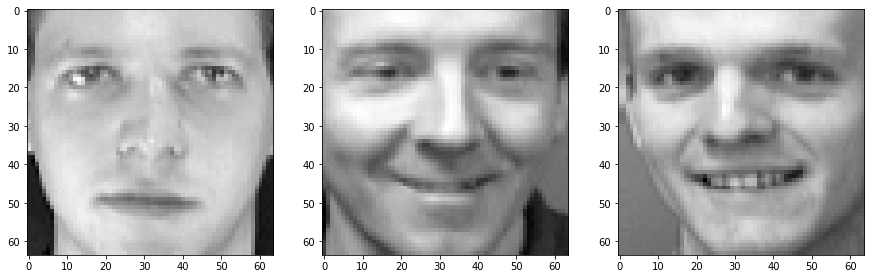

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    plot_face(X, i * 20, ax[i])

plt.show()

In [5]:
pca = PCA(random_state=0, n_components=0.99)

pca.fit(X)

PCA(n_components=0.99, random_state=0)

In [6]:
pca.n_components_

260

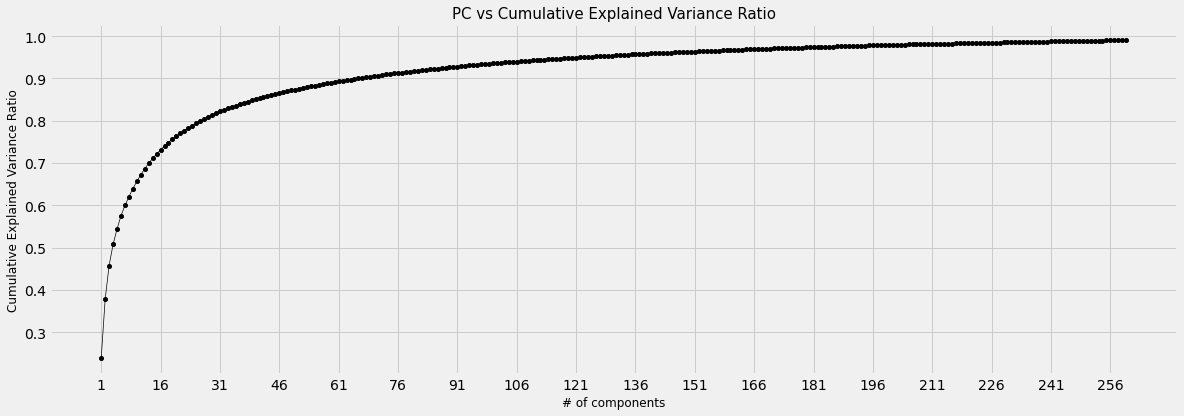

In [7]:
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))

plt.style.use('fivethirtyeight')
fig = plt.subplots(figsize=(18, 6))
plt.plot(cum_var, marker='o', color='black', ms=4, linewidth=0.7)

plt.title('PC vs Cumulative Explained Variance Ratio',fontsize=15)
plt.xlabel('# of components',fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio',fontsize=12)
plt.xticks(np.arange(0, pca.n_components_, 15), np.arange(1, pca.n_components_ + 1, 15))
plt.show()

In [8]:
pca = PCA(random_state=0, n_components=0.97)

pca.fit(X)

PCA(n_components=0.97, random_state=0)

In [9]:
pca.n_components_

169

In [10]:
print(f"CR = {X.shape[1] / pca.n_components_:.2f}")

CR = 24.24


In [11]:
X_comp = pca.fit_transform(X)

In [12]:
X_decomp = pca.inverse_transform(X_comp)

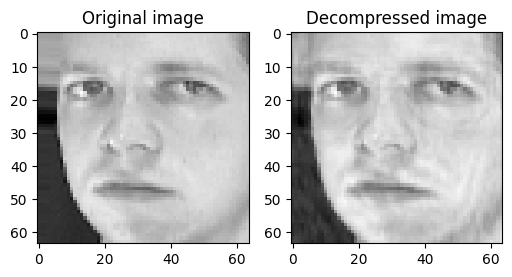

In [13]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

plot_face(X, 5, ax[0])
ax[0].set_title("Original image")

plot_face(X_decomp, 5, ax[1])
ax[1].set_title("Decompressed image")

plt.show()

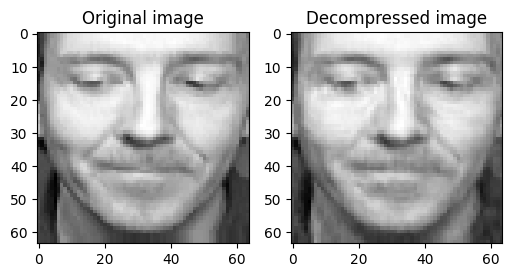

In [14]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

plot_face(X, 25, ax[0])
ax[0].set_title("Original image")

plot_face(X_decomp, 25, ax[1])
ax[1].set_title("Decompressed image")

plt.show()

In [15]:
print(f"RMSE = {mse(X, X_decomp, squared=False)}")

RMSE = 0.02327416092157364


 ## Rotacja 90

In [18]:
X_rot = X.copy()

for i in range(X.shape[0]):
    x = np.transpose(X[i].reshape((64, 64)))
    X_rot[i] = x.reshape((4096, ) )

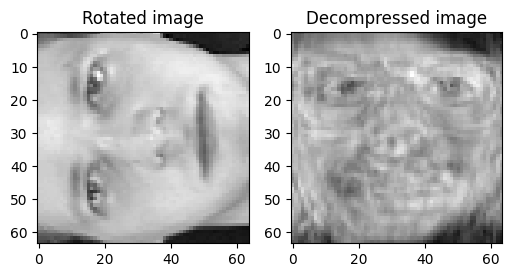

In [19]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ax[0].imshow(np.reshape(X_rot[0], (64, 64)), cmap='gray')
ax[0].set_title("Rotated image")

X_rot_inv = pca.inverse_transform(pca.transform(X_rot))

ax[1].imshow(np.reshape(X_rot_inv[0], (64, 64)), cmap='gray')
ax[1].set_title("Decompressed image")

plt.show()

## Przyciemnienie

In [20]:
X_darken = X.copy()

X_darken = np.clip(X - 0.3, 0, 1)

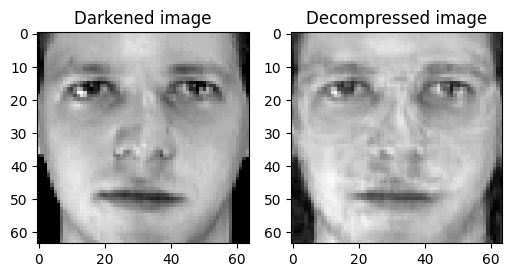

In [21]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ax[0].imshow(np.reshape(X_darken[0], (64, 64)), cmap='gray')
ax[0].set_title("Darkened image")

X_darken_inv = pca.inverse_transform(pca.transform(X_darken))

ax[1].imshow(np.reshape(X_darken_inv[0], (64, 64)), cmap='gray')
ax[1].set_title("Decompressed image")

plt.show()

## Rozjaśnienie

In [22]:
X_brighten = X.copy()

X_brighten = np.clip(X + 0.3, 0, 1)

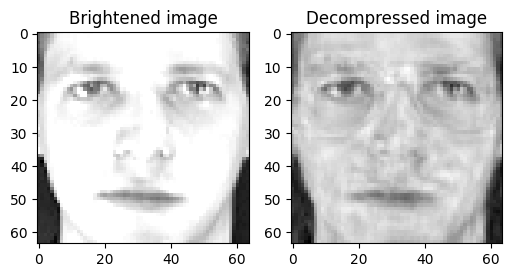

In [23]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ax[0].imshow(np.reshape(X_brighten[0], (64, 64)), cmap='gray')
ax[0].set_title("Brightened image")

X_brighten_inv = pca.inverse_transform(pca.transform(X_brighten))

ax[1].imshow(np.reshape(X_brighten_inv[0], (64, 64)), cmap='gray')
ax[1].set_title("Decompressed image")

plt.show()

## Odwrócone

In [24]:
X_flip = X.copy()

X_flip = np.flip(X)

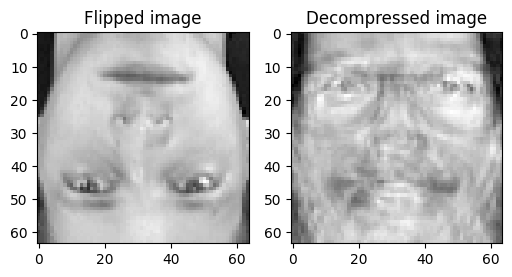

In [25]:
plt.rcParams.update(plt.rcParamsDefault)
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ax[0].imshow(np.reshape(X_flip[399], (64, 64)), cmap='gray')
ax[0].set_title("Flipped image")

X_flip_inv = pca.inverse_transform(pca.transform(X_flip))

ax[1].imshow(np.reshape(X_flip_inv[399], (64, 64)), cmap='gray')
ax[1].set_title("Decompressed image")

plt.show()

## Wnioski

PCA może być przydatne przy wykrywaniu anomilii dotyczących rozjaśnienia lub przyciemnienia, jednak w przypadku obrotu nie daje zbyt dużo.